# Курс 2

## Глава 1: Анализ номинативных данных

In [2]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 25,
        'axes.labelsize': 25,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'font.size': 20,
        'figure.figsize': (12, 8),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

### Распределение Хи-квадрат

60
ndf = 5
chi2 = 8.4
From scipy stats chisquare:
chi2 = 8.4
p_value = 0.13552522337752967
From scipy stats chi2:
p-value = 0.13552522337752967


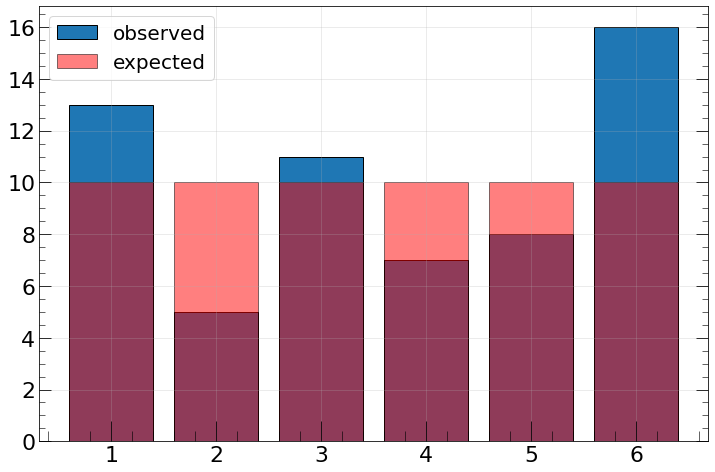

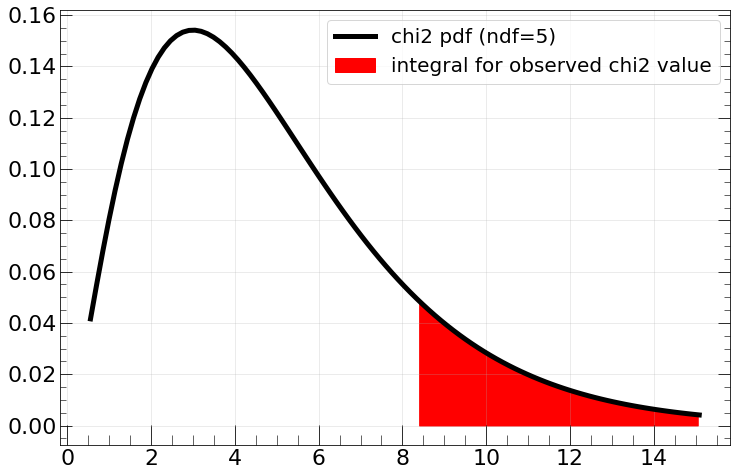

In [65]:
# Есть набор наблюдаемы данных, например, частота появления значений 1-6 при подбрасываниy_ кубика
# и есть теоретическое распределение этих значений, в данном случае равномерное, то есть вероятность
# выпадения каждой цифры от 1 до 6 равна 1/6.
# x_i - значиния величины (от 1 до 6)
# y_i (y_i_obs) - наблюдаемые частоты появления значений соответствующего x_i
# f(x_i) (или y_i_exp) - теортетичесое значение количества появления значений x_i
# Тогда значение Хи-квадрат рассчитывается по следующей формуле
# Chi2 = sum{ (y_i_exp - y_i_obs)^2 / y_i_exp }

# Пример

def chi2_value(exp, obs):
    y_exp = np.array(exp)
    y_obs = np.array(obs)
    return ((y_exp - y_obs)**2 / y_exp).sum()
    

# Задаем данные
n = 60
x = [1, 2, 3, 4, 5, 6]
y_exp = [float(1.0/6.0) * n for _ in range(6)]
y_obs = [13, 5, 11, 7, 8, 16]
print(sum(y_obs))

# Число степеней свободы для распределения Хи-квадрат это N-1, где N это число
# возможных исходов

ndf = len(x) - 1
print(f'ndf = {ndf}')

# Рассчитываем Хи-кварат
chi2 = chi2_value(y_exp, y_obs)
print(f'chi2 = {round(chi2, 3)}')
print('From scipy stats chisquare:')
print(f'chi2 = {stats.chisquare(y_obs, y_exp)[0]}')
print(f'p_value = {stats.chisquare(y_obs, y_exp)[1]}')

# Можно построить гистограмму
fig, ax = plt.subplots(1, 1)
ax.bar(x, y_obs, edgecolor='black', label='observed')
ax.bar(x, y_exp, edgecolor='black', color='red', alpha=0.5, label='expected')
ax.legend()

# Рассчитаем p-value, просто используя распределение Хи-квадрат и рассчитанные
# значение chi2 и число стпеней свободы как интеграл от хвоста распределения
print('From scipy stats chi2:')
p_value = stats.chi2(df=ndf).sf(chi2)
print(f'p-value = {p_value}')

# Можно также нарисовать эту функцию распределения Хи-квадрат с 5 степенями свободы (pdf)
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.chi2.ppf(0.01, ndf),
                stats.chi2.ppf(0.99, ndf), 100)
ax.plot(x, stats.chi2.pdf(x, ndf),
       'r-', color='black', lw=5, alpha=1, label=f'chi2 pdf (ndf={ndf})')
section = np.arange(chi2, x[-1], 1/20.)
ax.fill_between(section, stats.chi2.pdf(section, ndf), color='red', label='integral for observed chi2 value')
ax.legend()

## Вопросы из тестов на Stepik

In [69]:
# Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?
answer = stats.chi2(df=2).cdf(4.0) - stats.chi2(df=2).cdf(2.0)
print(f'Integral Chi2 (2.0, 4.0, cdf=2) = {round(answer,5)}')

Integral Chi2 (2.0, 4.0, cdf=2) = 0.23254


In [73]:
# Снова игральные кости, необходимо рассчитать p-value
y_obs = [10,10,10,5,10,15]
y_exp = [(1.0/6.0)*sum(y_obs) for _ in range(6)]
print('observed:')
print(y_obs)
print('expected:')
print(y_exp)
chi2 = chi2_value(y_exp, y_obs)
ndf = len(y_obs) - 1
print(f'chi2 = {chi2}')
print(f'ndf = {ndf}')
p_value = stats.chi2(df=ndf).sf(chi2)
print(f'p-value = {p_value}')

observed:
[10, 10, 10, 5, 10, 15]
expected:
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
chi2 = 5.0
ndf = 5
p-value = 0.4158801869955079


In [76]:
# Нужно проверить гипотезу о равномерности распределения
values_obs = [10, 30, 50]
values_exp = [(1.0/3.0)*sum(values_obs) for _ in range(len(values_obs))]
chi2 = chi2_value(values_exp, values_obs)
ndf = len(values_obs) - 1
print(f'chi2 = {round(chi2,2)}')
p_value = stats.chi2(df=ndf).sf(chi2)
print(f'p-value = {p_value}')

chi2 = 26.67
p-value = 1.61959679231261e-06


In [78]:
# В группе 15 юношей и 9 девушек, найти уровень значимости для гипотезы, что рапределение равномерно
obs = [15, 9]
def chi2_const(obs):
    exp = [(1.0/len(obs))*sum(obs) for _ in range(len(obs))]
    chi2, p_value = stats.chisquare(obs, exp)
    return chi2, p_value

chi2, p_value = chi2_const(obs)
print(f'chi2 = {chi2}')
print(f'p-value = {p_value}')

chi2 = 1.5
p-value = 0.22067136191984324


В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако ﻿его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.
При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.
Введите в ответ получившийся p-уровень значимости для проверки этой гипотезы. 

In [79]:
n = 1500
fraction_pos = 0.53
fraction_neg = 1 - fraction_pos
obs = [fraction_pos * 1500, fraction_neg * 1500]

chi2, p_value = chi2_const(obs)
print(f'chi2 = {chi2}')
print(f'p-value = {p_value}')

chi2 = 5.4
p-value = 0.02013675155034633


### Анализ таблиц сопряжённоси

In [101]:
# Таблица с распеределением по полу и специльности

d = {'Boys': [15, 11], 'Girls': [9, 6]}
data = pd.DataFrame(data=d, index=['Biology', 'IT'])
print(data)
n_total = data['Boys'].sum() + data['Girls'].sum()
print(data.loc['IT', 'Boys'])

# Формула для рассчёта ожидаемого числа в ячейке при условии, что распределения по профессиям
# не зависит от пола (и наоброт пол не зависит от профессии)
# f_ij = (f_i * f_j) / n_total
# f_i - число наблюдений в данной строке
# f_j - число наблюдений в данном столбце
boys_it_exp = data.loc[:, 'Boys'].sum() * data.loc['IT',:].sum() / n_total
print(boys_it_exp)

# Простое решение с помощью scipy stats 
print('------ Solution -------')
sex_table = ([15,9], [11,6])
stat, p_value, ndf, table_exp = stats.chi2_contingency(sex_table)
print(table_exp)

         Boys  Girls
Biology    15      9
IT         11      6
11
10.78048780487805
------ Solution -------
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


In [98]:
table_obs = ([10, 6], [5, 15])
table_exp = stats.chi2_contingency(table_obs)[3]
print(table_exp)

[[ 6.66666667  9.33333333]
 [ 8.33333333 11.66666667]]


In [105]:
table_obs = ([20, 15], [11, 12], [7, 9])
p_value = stats.chi2_contingency(table_obs)[1]
print(p_value)

0.6205162173513055


### Pivot table

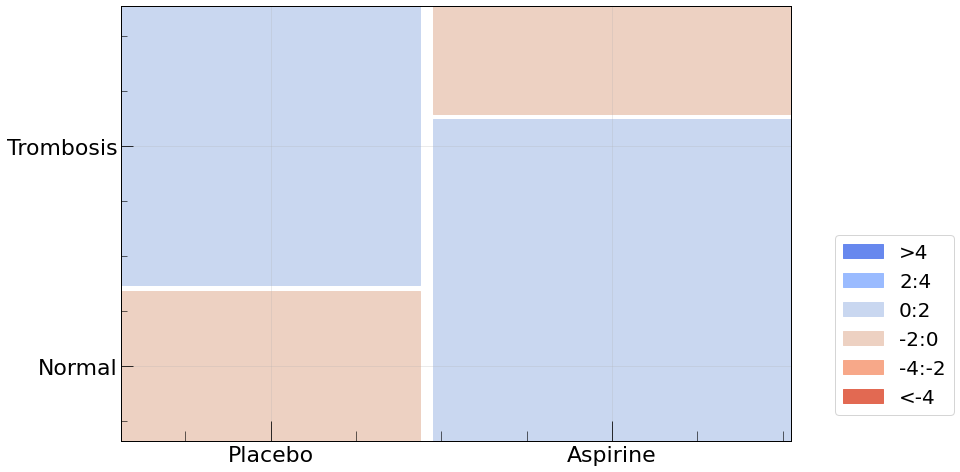

In [247]:
# Импорт необходимых модулей
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    residuals = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in residuals.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))
    
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)
make_me_plot(data)

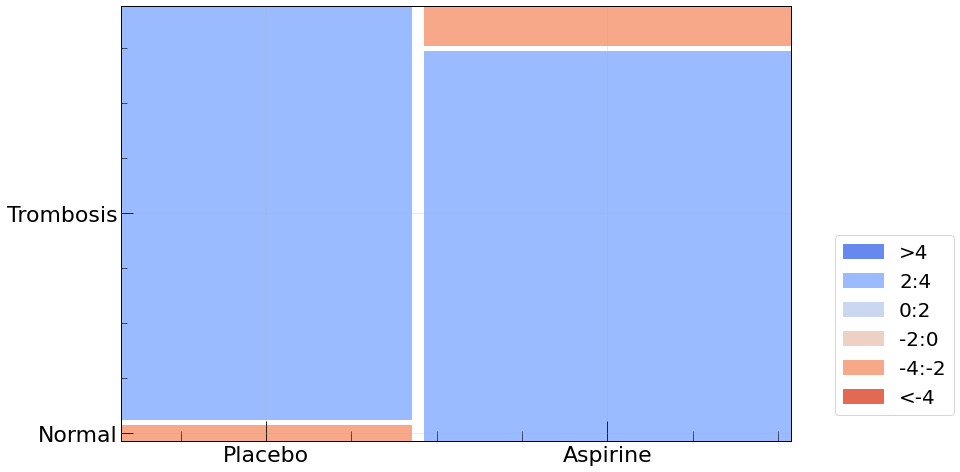

In [108]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([1, 25, 30, 3], index=idx)
make_me_plot(data)

## Точный критерий Фишера

In [109]:
odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов
print(f'odds_ratio = {odds_ratio}')
print(f'p_value = {p_value}')

odds_ratio = 0.1111111111111111
p_value = 0.48571428571428527


### Exercises with Titanic dataset

In [250]:
data = pd.read_csv('titanic.csv')

In [251]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [252]:
# Выбираем две номинативные переменные, чтобы проверить связь между ними
# Пусть это будет класс билета (Pclass) и выживаемость (Survived)
print(f'Survived: {", ".join(map(str, data.Survived.unique()))}')
print(f'Pclass: {", ".join(map(str, data_test.Pclass.unique()))}')

# Сгруппируем данные по этим двум категориям посчитаем число наблюдений (людей) в каждой ячейке
data_grouped = data.groupby(by=['Survived', 'Pclass']).size()
# Make numpy 2d array from this data
data_array = np.column_stack([data_grouped[i].values for i in data['Survived'].unique()]).T
print(data_array)
# And also we can make Dataframe
df_surive = pd.DataFrame(data_array, columns=[1, 2, 3])

# Теперь применим к этому двумерному массиву Хи-квадрат критерий Пирсона
chi2, p_value, ndf, table_exp = stats.chi2_contingency(data_array)

Survived: 0, 1
Pclass: 3, 1, 2
[[ 80  97 372]
 [136  87 119]]


In [255]:
# Теперь напишем функцию, которая проверяет гипотезу о независимости этих двух переменных с помощью 
# критерия Хи-квадрат или точного критерия Фишера

def smart_test(df, col1, col2):
    # Сгруппируем данные по этим двум категориям посчитаем число наблюдений (людей) в каждой ячейке
    data_grouped = df.groupby(by=[col1, col2]).size()
    # Make numpy 2d array from this data
    array_2d = np.column_stack([data_grouped[i].values for i in df[col1].unique()]).T
    # And also we can make Dataframe
    df_surive = pd.DataFrame(array_2d, columns=[1, 2, 3])
    chi2, p_value, ndf, table_exp = stats.chi2_contingency(data_array)
    #make_me_plot(data_grouped)
    return chi2, ndf, p_value

smart_test(data, 'Survived', 'Pclass')

(102.88898875696056, 2, 4.549251711298793e-23)

### Задачка с биоиформатикой

In [285]:
data = pd.read_csv('test_data.csv')
data.head()
data['V1'].value_counts()
# Рассчитываем частоты появления каждой из букв в каждой из последовательностей
data_freq = data.apply(pd.value_counts)
# И транспонируем её, так будет удобнее
data_freq = data_freq.T
data_freq

,A,C,G,T
V1,6,7,10,7
V2,6,9,10,5
V3,11,4,6,9


In [302]:
# Теперь мы можем провести Хи-квадарат тест, чтобы выяснить, насколько верна гипотеза о том, что разыне
# буквы встречаются одинаково часто в разных последовательностях
chi2, p_value, ndf, expected = stats.chi2_contingency(data_freq)
print('Expected distribution for every sequence:')
print(expected[0])

# Теперь мы можем последовательно применить Хи-квадрат тест уже отдельно к каждой из последовательностей
for i in data_freq.index:
    print(f'sequence {i}')
    print(stats.chisquare(expected[0], data_freq.loc[i, :].values))

Expected distribution for every sequence:
[7.66666667 6.66666667 8.66666667 7.        ]
sequence V1
Power_divergenceResult(statistic=0.6566137566137569, pvalue=0.8833581943145765)
sequence V2
Power_divergenceResult(statistic=2.045679012345679, pvalue=0.5629801872299336)
sequence V3
Power_divergenceResult(statistic=4.417508417508417, pvalue=0.21976743092589704)


### Iris species

In [376]:
# Нужно ввести новую колонку Important_case
# Она будет иметь значение 'Yes', если хотя бы 3 количественных переменных для цветка имеют значения
# выше средних и 'No' в противном случае
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [377]:
# Для начала взглянем на среднии значения в колонках
float_cols = []
for col in data.columns:
    if data[col].dtype == float:
        print(f'{col} mean = {round(data[col].mean(), 3)}')
        float_cols.append(col)

SepalLengthCm mean = 5.843
SepalWidthCm mean = 3.054
PetalLengthCm mean = 3.759
PetalWidthCm mean = 1.199


In [348]:
# более изящное решение с генератором словарей
# вместо agg, думаю, можно использовать apply
discriminator_dict = {k: lambda x: (x > x.mean()).apply(int) for k in float_cols}
discriminator_series = data.agg(discriminator_dict).apply(lambda x: 'Yes' if x.sum() >= 3 else 'No', axis=1)
data['Important_case'] = discriminator_series
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Important_case
0,1,5.1,3.5,1.4,0.2,Iris-setosa,No
1,2,4.9,3.0,1.4,0.2,Iris-setosa,No
2,3,4.7,3.2,1.3,0.2,Iris-setosa,No
3,4,4.6,3.1,1.5,0.2,Iris-setosa,No
4,5,5.0,3.6,1.4,0.2,Iris-setosa,No
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Yes
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Yes
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Yes
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Yes


In [378]:
# в одну строчку
data['Important_case'] = (data.loc[:, float_cols] > data.loc[:, float_cols].mean()).apply(lambda x: 'Yes' if sum(x.apply(int)) >= 3 else 'No', axis=1)

### Задачки на рассчёт вероятностей, шансов и лографимов шансов

In [392]:
# Рассчитайте логарифм шанса, того что случайно выбранный человек из нашей выборки окажется биологом.

d = {'Boys': [15, 11], 'Girls': [9, 6]}
data = pd.DataFrame(data=d, index=['Biology', 'IT'])
print(data)

p_biologist = data.loc['Biology', :].sum() / data.sum().sum()
print(f'p = {p_biologist}')
log_chance = math.log(p_biologist / (1 - p_biologist))
print(f'log chance = {log_chance}')

         Boys  Girls
Biology    15      9
IT         11      6
p = 0.5853658536585366
log chance = 0.3448404862917294


## Логистическая регрессия

### Модель без предикторов

In [436]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [437]:
# Строим регрессионную модель зависимости ln(p/(1-p)) логарифма шансов выжить от предикторов (парметров пассажира)

data.Survived.value_counts()
np.log(342/549)
glm_binom2 = smf.glm(formula="Survived ~ 1",
                     data=data, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Mon, 27 Feb 2023   Deviance:                       1186.7
Time:                        17:49:13   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338
==============================================================================
"""

In [438]:
# Сколько погибло и сколько выжило
print(f'survived = {df.loc[(data.Survived > 0), :].shape[0]}')
print(f'not survived = {df.loc[(data.Survived == 0), :].shape[0]}')

survived = 342
not survived = 549


In [439]:
n_survived = (data.Survived > 0).sum()
survived = np.array([n_survived, data.shape[0] - n_survived])
print(survived)
odds = survived[0] / survived[1]
print(f'odds = {odds}')

# Логарифм шанса и есть значение intercept, то есть вероятности выжить для случайно взятого пассажира
odds_log = np.log(odds)
print(f'odds log = {odds_log}')

[342 549]
odds = 0.6229508196721312
odds log = -0.4732877044469254


### Задачки

In [435]:
def calculate_p(logit):
    print(f'odds =  {math.exp(logit)}')
    print(f'p = {math.exp(logit) / (1 + math.exp(logit))}')
    
calculate_p(0.5)
calculate_p(-0.8472979)

odds =  1.6487212707001282
p = 0.6224593312018546
odds =  0.42857141159451617
p = 0.29999999168131286


### Модель одним номинативным предиктором

In [440]:
category_columns = { col: 'category' for col in ['Survived', 'Sex'] }  # приведение выбранных колонок к категориальному
data = pd.read_csv('titanic.csv', dtype=category_columns)

# Зависимая переменная обычно обозначается как "Y" или "y"
Y = data.loc[:,'Survived'].cat.codes

# То о чем говорил преподаватель: колонку пол c сдвумя градациями нужно 
# трансформировать в 2 колонки для каждого пола
X = sm.add_constant( data.loc[:,'Sex'].cat.codes )

#
# ВЫЧИСЛЯЕМ  
#
# Классическое представление результат-предиктор(ы), которое используется в классификаторах
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()

# Можно и так (кто привык к R)
glm_binom_rstyle = smf.glm(formula="Survived ~ Sex", data=data, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()


print( res.summary() )
print( res_rstyle.summary() )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Mon, 27 Feb 2023   Deviance:                       917.80
Time:                        17:51:17   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0566      0.129      8.191      0.0

In [476]:
data = pd.read_csv('titanic.csv')
survived_sex = data.groupby(by=['Sex', 'Survived']).size()

odds_male = survived_sex['male'][1] / survived_sex['male'][0]
odds_female = survived_sex['female'][1] / survived_sex['female'][0]

print(f"odds male = {odds_male}")
print(f"odds female = {odds_female}")

print(f"log odds male = {math.log(odds_male)}")
# This is const (Intercept) coeff
print(f"log odds female = {math.log(odds_female)}")

odds_ratio = odds_male / odds_female
print('odds ratio =', odds_ratio)
# This is 0 (Sex[T.male]) coeff
print('log odds ratio =', math.log(odds_ratio))

odds male = 0.2329059829059829
odds female = 2.876543209876543
log odds male = -1.457120413688503
log odds female = 1.0565892988932617
odds ratio = 0.08096731594585672
log odds ratio = -2.5137097125817647


### Другой способ построить модель

In [3]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('titanic.csv')

SexSurvived = pd.crosstab(data.Survived, data.Sex)
SexSurvived

Sex,female,male
Survived,,
0,81,468
1,233,109


In [8]:
y = data.Survived
# так как там были значения типа string, то надо перевести в номинативный тип
X, _ = pd.factorize(data.Sex)
# convert 1d array to column vector
X = X.reshape((-1, 1))

# penalty - это регулиризация, которая нас, в данный момент, не касается
model = LogisticRegression(penalty='none')
clf = model.fit(X, y)

print(f'''
coef:\t\t{np.asscalar(clf.coef_):.4f}
intercept:\t{np.asscalar(clf.intercept_):.4f}
''')



odds_f = SexSurvived['female'][1]/SexSurvived['female'][0]
odds_m = SexSurvived['male'][1]/SexSurvived['male'][0]
odds_fm = odds_f/odds_m
odds_mf = odds_m/odds_f
print(f'''
log(odds_f) = {np.log(odds_f):.4f}
log(odds_m) = {np.log(odds_m):.4f}
log(odds_fm) = {np.log(odds_fm):.4f}
log(odds_mf) = {np.log(odds_mf):.4f}
''')


coef:		2.5137
intercept:	-1.4571


log(odds_f) = 1.0566
log(odds_m) = -1.4571
log(odds_fm) = 2.5137
log(odds_mf) = -2.5137



/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  del sys.path[0]


In [11]:
math.exp(1.1243) + math.exp(-2.4778)

3.161989115096665

### Модель с двумя номинативными предикторами

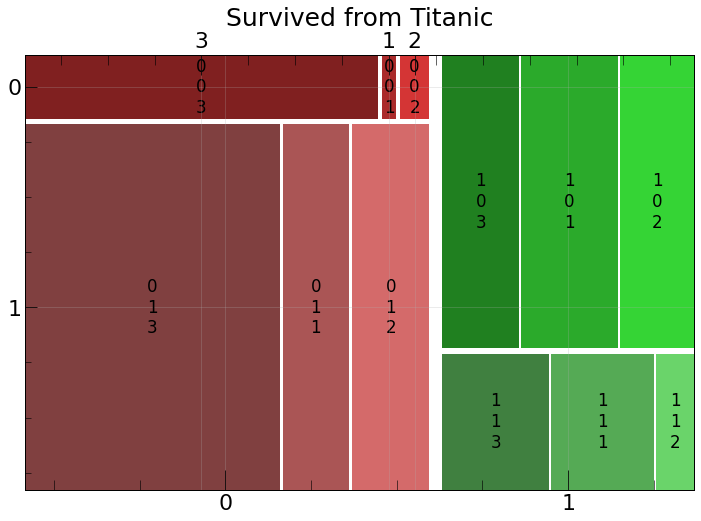

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize']=(12, 8) # ура, установили размер
mosaic(data, ['Survived', 'Sex', 'Pclass'], gap = 0.02, title='Survived from Titanic')
plt.show()

score = 0.7838983050847458
Optimization terminated successfully.
         Current function value: 0.449772
         Iterations 7


/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.3341
Time:                        17:08:03   Log-Likelihood:                -321.14
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.650e-67
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.3081      0.588      5.628      0.000       2.156       4.460
C(Sex)[T.1]                   -3.7301      0.622     -5.997      0.000      -4.949      -2.511
C(Pclass)[T.2]                -0.8804      0.726     -1.213      0.225      -2.303       0.542
C(Pclass)[T.3]                -3.4653      0.620     -5.585      0.000      -4.681      -2.249
C(Sex)[T.1]:C(Pclass)[T.2]    -0.4204      0.804     -0.523      0.601      -1.997       1.156
C(Sex)[T.1]:C(Pclass)[T.3]     2.1542      0.676      3.185      0.001       0.829       3.480
==============================================================================================
"""

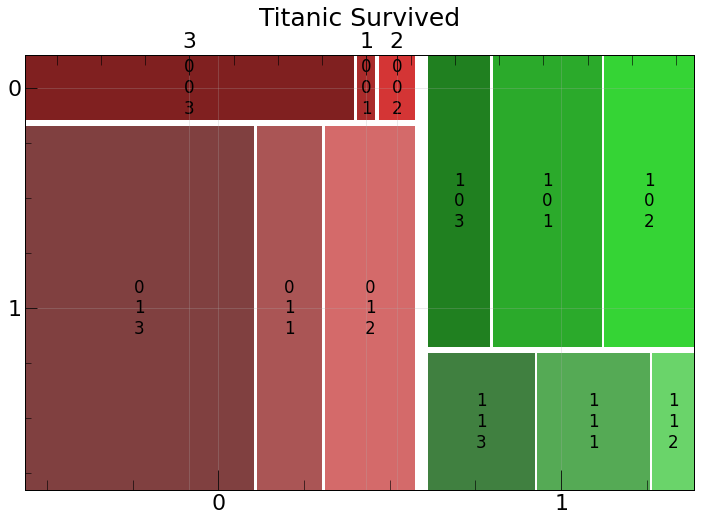

In [95]:
data["Sex"] = data["Sex"].replace("male", 1).replace("female", 0)
x = data[["Sex", "Pclass"]].values
y = data["Survived"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
model = LogisticRegression(n_jobs=1).fit(x_train, y_train)
y_predict = model.predict(x_test)
score = model.score(x_test, y_test)
print('score =', score)

mode = smf.logit(formula="Survived ~ C(Sex)*C(Pclass)", data=data).fit()
display(mode.summary())

plt.rcParams["figure.figsize"]=(12,8)
mosaic(data, ["Survived", "Sex", "Pclass"], gap=0.02, title="Titanic Survived")
plt.show()

### Ещё одна задачка на глазомер

In [45]:
intercept = math.log(0.25)
print(f'intercept = {intercept}')
placebo = math.log(0.8 / 0.25)
print(f'placebo = {placebo}')
treatment = math.log(4.0 / 0.25)
print(f'treatment = {treatment}')
male_placebo = math.log(1000.0 / 0.8)
print(f'male_placebo = {male_placebo}')
male_treatment = math.log(1.5 / 0.8)
print(f'male_treatment = {male_treatment}')
#print(f'placebo = {}')

intercept = -1.3862943611198906
placebo = 1.1631508098056809
treatment = 2.772588722239781
male_placebo = 7.1308988302963465
male_treatment = 0.6286086594223741


In [53]:
sex, Non, placebo, treatment = 1, 0, 0, 1

logit_male_treatment = -1.15 + 0.80 * sex + 0.82 * placebo + 2.13 * treatment + 16.11 * sex * placebo - 0.17 * sex * treatment
logit_male_treatment
print(logit_male_treatment)
p = math.exp(logit_male_treatment) / (1 + math.exp(logit_male_treatment))
print(p)

1.61
0.8334113864245404


### Номинативные и количественные предикторы

In [61]:
# Здесь мы хотим включиь ещё и возраст (Age) в качестве нового предиктора
# Для начала хорошо бы убрать Nan из колонки Age
display(data['Age'].isna())
data = data.dropna(subset=['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: Age, Length: 714, dtype: bool

In [99]:
data["Sex"] = data["Sex"].replace("male", 1).replace("female", 0)
x = data[["Sex", "Pclass", "Age"]].values
y = data["Survived"].values

print('sklearn LogisticRegression:')
model = LogisticRegression(n_jobs=1).fit(x, y)
model_coeffs = np.append(model.intercept_, model.coef_)
#for col, coeff in zip(["Intercept"]+["Sex", "Pclass", "Age"], model_coeffs):
#    print(f'{col} = {coeff}')
cdf = pd.DataFrame(model_coeffs, ["Intercept"]+["Sex", "Pclass", "Age"], columns=['Coefficients'])
display(cdf)

print('statsmodels logit simple one')
# C(Preidctor) to set predictor base level
log_reg = smf.logit(formula="Survived ~ Sex + Pclass + Age", data=data).fit()
display(log_reg.summary())

print('statsmodels logit without predictors inteference')
# C(Preidctor) to set predictor base level
log_reg = smf.logit(formula="Survived ~ C(Sex) + C(Pclass) + Age", data=data).fit()
display(log_reg.summary())

print('statsmodels logit with predictors inteference')
# replace '+' with '*' to get results with inerference
log_reg = smf.logit(formula="Survived ~ C(Sex) * C(Pclass) * Age", data=data).fit()
display(log_reg.summary())

sklearn LogisticRegression:


/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Coefficients
Intercept,4.880801
Sex,-2.412333
Pclass,-1.248849
Age,-0.036118


statsmodels logit simple one
Optimization terminated successfully.
         Current function value: 0.453285
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.3289
Time:                        17:19:13   Log-Likelihood:                -323.65
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.860e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0560      0.502     10.069      0.000       4.072       6.040
Sex           -2.5221      0.207    -12.168      0.000      -2.928      -2.116
Pclass        -1.2885      0.139     -9.253      0.000      -1.561      -1.016
Age           -0.0369      0.008     -4.841      0.000      -0.052      -0.022
==============================================================================
"""

statsmodels logit without predictors inteference
Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.3289
Time:                        17:19:13   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Sex)[T.1]       -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""

statsmodels logit with predictors inteference
Optimization terminated successfully.
         Current function value: 0.421100
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                           11
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.3765
Time:                        17:19:13   Log-Likelihood:                -300.67
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 3.919e-71
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.5756      1.453      1.084      0.278      -1.272       4.423
C(Sex)[T.1]                       -0.4001      1.585     -0.252      0.801      -3.507       2.707
C(Pclass)[T.2]                     2.4890      1.971      1.263      0.207      -1.374       6.352
C(Pclass)[T.3]                    -1.1079      1.508     -0.734      0.463      -4.064       1.849
C(Sex)[T.1]:C(Pclass)[T.2]        -2.7561      2.177     -1.266      0.205      -7.022       1.510
C(Sex)[T.1]:C(Pclass)[T.3]        -0.8730      1.688     -0.517      0.605      -4.180       2.434
Age                                0.0576      0.051      1.130      0.258      -0.042       0.157
C(Sex)[T.1]:Age                   -0.0971      0.053     -1.828      0.068      -0.201       0.007
C(Pclass)[T.2]:Age                -0.1086      0.062     -1.745      0.081      -0.231       0.013
C(Pclass)[T.3]:Age                -0.0866      0.054     -1.617      0.106      -0.192       0.018
C(Sex)[T.1]:C(Pclass)[T.2]:Age     0.0411      0.070      0.588      0.557      -0.096       0.178
C(Sex)[T.1]:C(Pclass)[T.3]:Age     0.0886      0.058      1.529      0.126      -0.025       0.202
==================================================================================================
"""

### Центрировать количественные (номинативные) предикторы для смены нулевого (базового) уровня

In [17]:
data = pd.read_csv('titanic.csv')
data = data.dropna(subset=['Age'])

data["Sex"] = data["Sex"].replace("male", 1).replace("female", 0)
x = data[["Sex", "Pclass", "Age"]].values
y = data["Survived"].values

print('statsmodels logit without predictors inteference')

# Чтобы центрировать количественный предиктор (возраст), например, на среднее можносделать так
data["Age"] = data["Age"] - data["Age"].mean()

# Используем Treatment(), чтобы установить базовый уровень предиктора
log_reg = smf.logit(formula="Survived ~ C(Sex) + C(Pclass, Treatment(reference=3)) + Age", data=data).fit()
display(log_reg.summary())

statsmodels logit without predictors inteference
Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.3289
Time:                        15:36:25   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0980      0.186      0.527      0.598      -0.266       0.462
C(Sex)[T.1]                               -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass, Treatment(reference=3))[T.1]     2.5806      0.281      9.169      0.000       2.029       3.132
C(Pclass, Treatment(reference=3))[T.2]     1.2708      0.244      5.207      0.000       0.793       1.749
Age                                       -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==========================================================================================================
"""

### Багаж в аэропорте

In [62]:
data1 = pd.read_csv('test_luggage_1.csv')
data2 = pd.read_csv('test_luggage_2.csv')

data['type'] = data['type'].replace(["Bag", "Suitcase"], [1,2])
data['is_prohibited'] = data['is_prohibited'].replace(['No', 'Yes'], [0, 1])

# Выводим предикторы, для которых уровень значимости выше примерно 2 sigma
def get_features(df):
    data = df.copy()
    data['type'] = data['type'].replace(["Bag", "Suitcase"], [1,2])
    data['is_prohibited'] = data['is_prohibited'].replace(['No', 'Yes'], [0, 1])
    log_reg = smf.logit(formula="is_prohibited ~ weight + length + width + C(type)", data=data).fit()
    display(log_reg.summary())
    print()
    coef_names = np.array([str(log_reg.summary().tables[1][i][0]) for i in range(1, len(log_reg.summary().tables[1]))])
    p_values = np.array([float(str(log_reg.summary().tables[1][i][4])) for i in range(1, len(log_reg.summary().tables[1]))])
    res = coef_names[p_values < 0.05]
    return res
    
get_features(data2)

Optimization terminated successfully.
         Current function value: 0.292329
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          is_prohibited   No. Observations:                   30
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            4
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.5783
Time:                        16:05:57   Log-Likelihood:                -8.7699
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 7.808e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.9547     34.944      1.229      0.219     -25.534     111.443
C(type)[T.2]    -3.1343      1.400     -2.238      0.025      -5.879      -0.390
weight           0.2670      0.124      2.153      0.031       0.024       0.510
length          -1.3571      0.825     -1.645      0.100      -2.974       0.260
width            0.2710      0.162      1.675      0.094      -0.046       0.588
================================================================================
"""

array(['C(type)[T.2]', 'weight'], dtype='<U12')

In [81]:
# Тренируем логистическию регрессию на одном сэмпле и делаем предсказание для другого

df_train = pd.read_csv('test_data_passangers.csv')
df_test = pd.read_csv('predict_passangers.csv')

# Reform data in train sample
df_train['type'] = df_train['type'].replace(["Bag", "Suitcase"], [1,2])
df_test['type']  = df_train['type'].replace(["Bag", "Suitcase"], [1,2])
df_train['is_prohibited'] = df_train['is_prohibited'].replace(['No', 'Yes'], [0, 1])

log_reg = smf.logit(formula="is_prohibited ~ weight + length + width + C(type)", data=df_train).fit()
display(log_reg.summary())

passenger = df_test['passangers']
probability = log_reg.predict(df_test)
passenger[probability > 0.2]

df_test['prob'] = probability
df_test['L + W'] = df_test['length'] + df_test['width']

display(df_test)

Optimization terminated successfully.
         Current function value: 0.456698
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          is_prohibited   No. Observations:                   30
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            4
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.3411
Time:                        17:12:02   Log-Likelihood:                -13.701
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                  0.006722
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.8485      9.224     -0.309      0.757     -20.927      15.230
C(type)[T.2]    -2.4760      1.074     -2.305      0.021      -4.581      -0.371
weight          -0.0578      0.091     -0.634      0.526      -0.237       0.121
length           0.1254      0.099      1.264      0.206      -0.069       0.320
width            0.1033      0.104      0.996      0.319      -0.100       0.307
================================================================================
"""

,weight,length,width,type,passangers,prob,L + W
0,81,56,24,2,Bob,0.376741,80
1,80,47,18,2,Anatoliy,0.100272,65
2,76,54,20,2,Ivan,0.293486,74
3,87,59,19,2,Polina,0.270804,78
4,80,59,19,2,Velimir,0.357560,78
5,70,53,21,2,Svetozar,0.364977,74
6,95,54,19,2,Vsevolod,0.111059,73
7,72,42,22,2,Nikolay,0.125034,64
8,73,45,23,2,Martin,0.178895,68
9,76,49,18,2,Poul,0.152879,67


### Shapiro test (проверка распределений на нормальность)

In [85]:
from scipy.stats import shapiro

data = pd.read_csv('test.csv')
display(data)

def norm_test(df):
    df_n = df.select_dtypes(include=np.number)
    df_s = df_n.apply(shapiro, axis=0)# .map(lambda x: round(x[1],3))
    return df_s

# statistics and p_values (2 rows)
norm_test(data)

,V1,V2,V3,V4,V5,V6
0,10.03,s,9.35,s,9.91,11.23
1,12.45,x,11.61,x,10.07,6.41
2,9.97,a,7.02,a,8.85,11.38
3,10.53,f,12.24,f,7.22,8.71
4,6.59,b,7.72,b,14.31,10.08
5,7.26,j,12.19,j,10.75,11.71
6,6.97,g,7.80,g,9.91,6.99
7,11.99,o,10.98,o,6.04,11.38
8,9.39,k,9.86,k,9.94,11.14
9,13.58,z,11.12,z,6.58,11.58


,V1,V3,V5,V6
0,0.941357,0.904586,0.914611,0.784430
1,0.568211,0.245834,0.314190,0.009374


## Кластерный анализ

In [86]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Text(0, 0.5, 'Sepal Length [cm]')

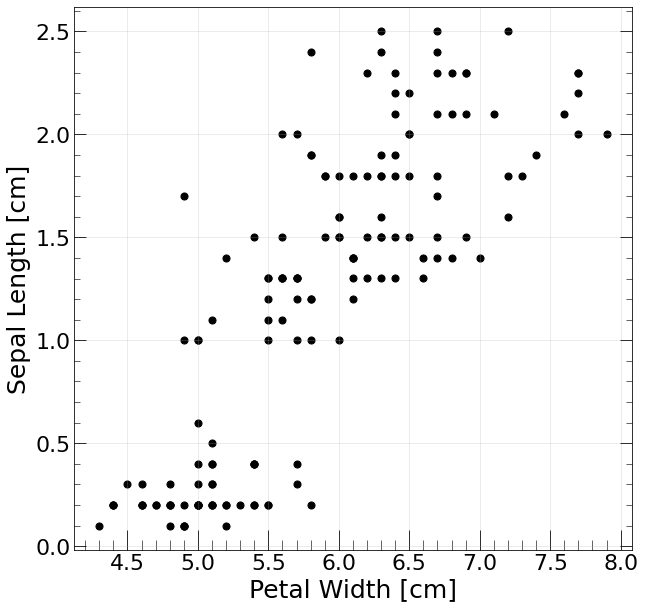

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(data['SepalLengthCm'], data['PetalWidthCm'], c='black', s=50)
ax.set_xlabel('Petal Width [cm]')
ax.set_ylabel('Sepal Length [cm]')

In [105]:
# Найти координаты центроида для точек с координатами
x = np.array([-3, 1, 2, 3, 5, 6, 7])
y = np.array([3, 4, 6, 8, 2, 11, 1])
print(x.mean(), y.mean())

3.0 5.0


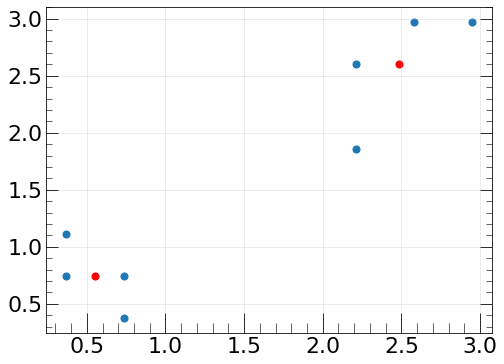

In [120]:
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten


points = np.array([[1.,2.], [2.,1.], [2.,2.], [1.,3.], [6.,7.], [6.,5.], [7.,8.], [8.,8.]])
whitened = whiten(points)

codebook_test, distortion_test = kmeans(points, 2)
codebook, distortion = kmeans(whitened, 2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.scatter(whitened[:, 0], whitened[:, 1], s=50)
plt.scatter(codebook[:, 0], codebook[:, 1], s=50, c='r')
plt.show()

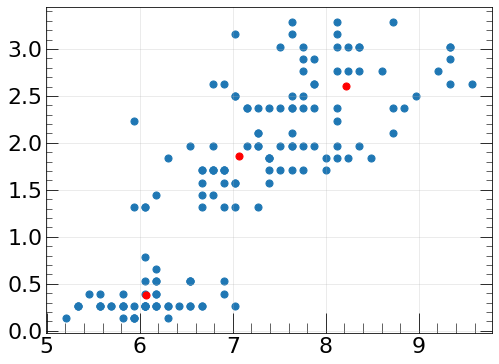

In [136]:
# Простой пример с kmeans из scipy

features_list = [[x, y] for x, y in zip(data['SepalLengthCm'].values, data['PetalWidthCm'].values)]
features = np.array(features_list)
whitened = whiten(features)
# Find 2 clusters in the data
clusters =('red', 'green', 'blue')
n_clusters = len(clusters)
codebook, distortion = kmeans(whitened, n_clusters)
# Plot whitened data and cluster centers in red
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.scatter(whitened[:, 0], whitened[:, 1], s=50)
plt.scatter(codebook[:, 0], codebook[:, 1], s=50, c='r')
plt.show()

inertia = 32.72652615902616


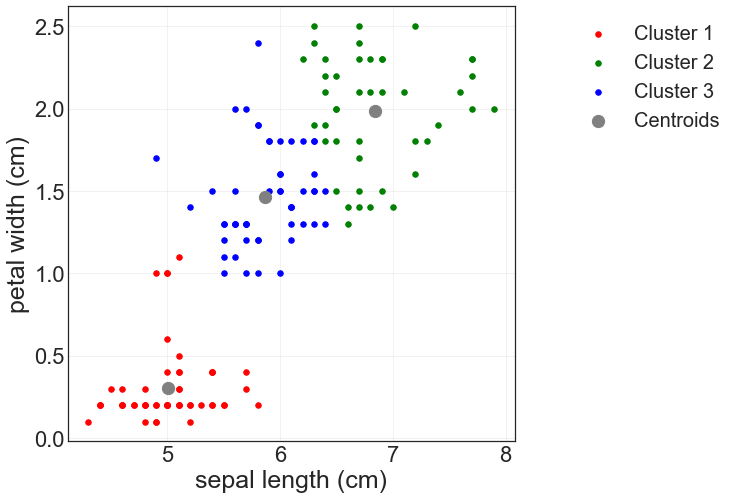

In [172]:
# sklearn

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

plt.figure(figsize=(8, 8))
plt.style.use('seaborn-white')

# грузим данные 
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)','petal width (cm)']].values

# определяем количество кластеров (равно количеству цветов в легенде)
clusters =('red', 'green', 'blue') # , 'yellow', 'violet'
n_clusters = len(clusters)

kmeans = KMeans(n_clusters=n_clusters, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
y_kmeans = kmeans.fit_predict(X)

# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
print('inertia =', kmeans.inertia_)

# отрисовываем группы
for i, color in enumerate(clusters):
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], s=30, c=color, label=f'Cluster {i+1}')
# орисовываем центроиды
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='grey', label='Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.grid()
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

array([188.73826667,  59.90948038,  32.72652616,  24.69231508,
        19.71965203,  15.9620859 ,  12.79173077,  10.97861111,
         9.50998898])

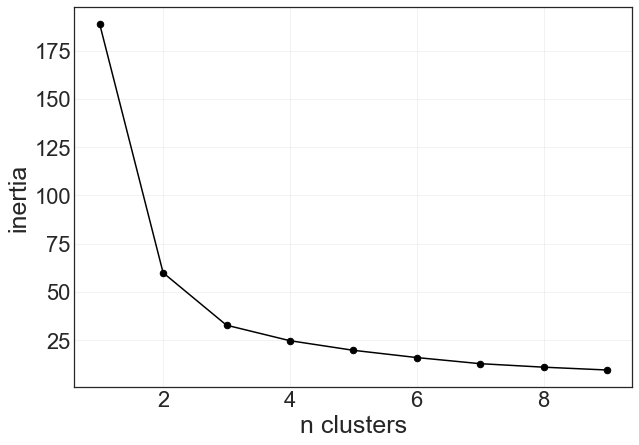

In [198]:
# N clusters vs inertia
n_test = np.arange(1, 10)
inertia_values = np.array([])

for n in n_test:
    kmeans_test = KMeans(n_clusters=n, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
    y_test = kmeans_test.fit(X)
    inertia_values = np.append(inertia_values, kmeans_test.inertia_)
    
display(n_test)
display(inertia_values)


fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(n_test, inertia_values, '.r-', color='black', markersize=13)
ax.set_xlabel('n clusters')
ax.set_ylabel('inertia')
ax.grid()

### Exercises

In [215]:
coords = np.array([[-3, 1, 2, 3, 5, 6, 7],
                 [3, 4, 6, 8, 2, 11, 1]])
x = coords[0]
y = coords[1]
x_mean = x.mean()
y_mean = y.mean()
x_centroid, y_centroid = x_mean, y_mean
print(f'centroid coords = {x_centroid, y_centroid}')

inertia = 0
for i,j in zip(x,y):
    inertia += (i - x_centroid)**2 + (j - y_centroid)**2
    
print(f'inertia = {inertia}')

# Or simply sum of sigma**2 * n observations
print((x.std()**2 + y.std()**2) * x.shape[0])

# Or even more simple solution with KMeans
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
kmeans = KMeans(n_clusters=1).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

centroid coords = (3.0, 5.0)
inertia = 146.0
146.00000000000003
[[3. 5.]]
146.0
